In [2]:
from hgraph.notebook import *
from hgraph import const, emit, TS

In [3]:
start_wiring_graph("test")

In [3]:
c = const("Hello World")

In [4]:
c.eval()

In [6]:
from hgraph import debug_print
debug_print("Message", c)

In [7]:
notebook_evaluate_graph()

2024-11-03 18:12:20,899 [hgraph][DEBUG] Creating graph engine: EvaluationMode.SIMULATION
2024-11-03 18:12:20,900 [hgraph][DEBUG] Starting to run graph from: 1970-01-01 00:00:00.000001 to 2299-12-31 23:59:59.999999
2024-11-03 18:12:20,902 [hgraph][DEBUG] Finished running graph


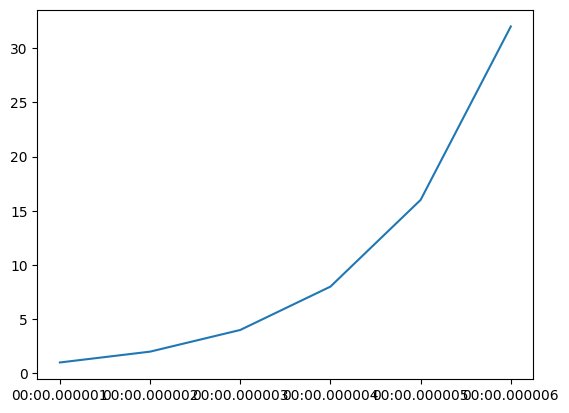

In [5]:
c = const((1, 2, 4, 8, 16, 32), TS[tuple[int, ...]])
t = emit(c)
t.plot()